In [191]:
#import nglview as nv
import numpy as np
from numpy import array
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.ticker as ticker
%matplotlib inline
import tqdm
plt.style.use('ggplot')

In [192]:
dataDir='/home/wjuan/lipid_kc'
filepath='/'.join([dataDir,'kc_pip2chol.txt'])
dataCHOL=pd.read_table(filepath,header=None,delim_whitespace=True)
dataCHOL.columns=['Chunk','pc-pc','pc-pi','pc-chol','pi-pi','pi-chol','chol-chol','sum']
print (dataCHOL.head())
filepath='/'.join([dataDir,'nij_pip2chol.txt'])
dataCHOLn=pd.read_table(filepath,header=None,delim_whitespace=True)
dataCHOLn.columns=['Chunk','pc-pc','pc-pi','pc-chol','pi-pi','pi-chol','chol-chol','sum']
dataCHOLn.head()

   Chunk     pc-pc     pc-pi   pc-chol     pi-pi   pi-chol  chol-chol  \
0      1  0.014107  0.002132  0.019342  0.000022  0.000991   0.002034   
1      2  0.013659  0.001940  0.017906  0.000172  0.001262   0.001666   
2      3  0.012722  0.001694  0.016139  0.000102  0.001139   0.002275   
3      4  0.014511  0.001464  0.019738  0.000062  0.001477   0.002510   

        sum  
0  0.038629  
1  0.036605  
2  0.034072  
3  0.039761  


,Chunk,pc-pc,pc-pi,pc-chol,pi-pi,pi-chol,chol-chol,sum
0,1,230.016,35.115,225.415,0.688,13.936,41.963,547.133
1,2,230.935,33.333,230.508,1.810,15.686,40.232,552.504
2,3,239.327,32.816,223.431,0.966,16.474,45.206,558.220
3,4,240.389,30.676,228.762,1.179,19.144,42.754,562.904


In [193]:
filepath='/'.join([dataDir,'kc_pip2.txt'])
dataPI=pd.read_table(filepath,header=None,delim_whitespace=True)
dataPI.columns=['Chunk','pc-pc','pc-pi','sum']
dataPI.head()
filepath='/'.join([dataDir,'nij_pip2.txt'])
dataPIn=pd.read_table(filepath,header=None,delim_whitespace=True)
dataPIn.columns=['Chunk','pc-pc','pc-pi','pi-pi','sum']
dataPIn.head()

,Chunk,pc-pc,pc-pi,pi-pi,sum
0,1,349.28,34.70,0.46,384.44
1,2,343.31,35.53,0.60,379.44
2,3,349.84,36.60,0.10,386.54
3,4,353.02,35.67,0.04,388.73
4,5,348.31,34.76,0.80,383.87


In [194]:
filepath='/'.join([dataDir,'kc_pops.txt'])
dataPS=pd.read_table(filepath,header=None,delim_whitespace=True)
dataPS.columns=['Chunk','pc-pc','pc-ps','ps-ps','sum']
dataPS.head()
filepath='/'.join([dataDir,'nij_pops.txt'])
dataPSn=pd.read_table(filepath,header=None,delim_whitespace=True)
dataPSn.columns=['Chunk','pc-pc','pc-ps','ps-ps','sum']
dataPSn.head()

,Chunk,pc-pc,pc-ps,ps-ps,sum
0,1,256.52,107.13,10.22,373.87
1,2,251.24,101.05,11.22,363.51
2,3,249.20,106.41,11.96,367.57
3,4,252.32,104.67,11.52,368.51
4,5,251.71,99.90,12.20,363.81


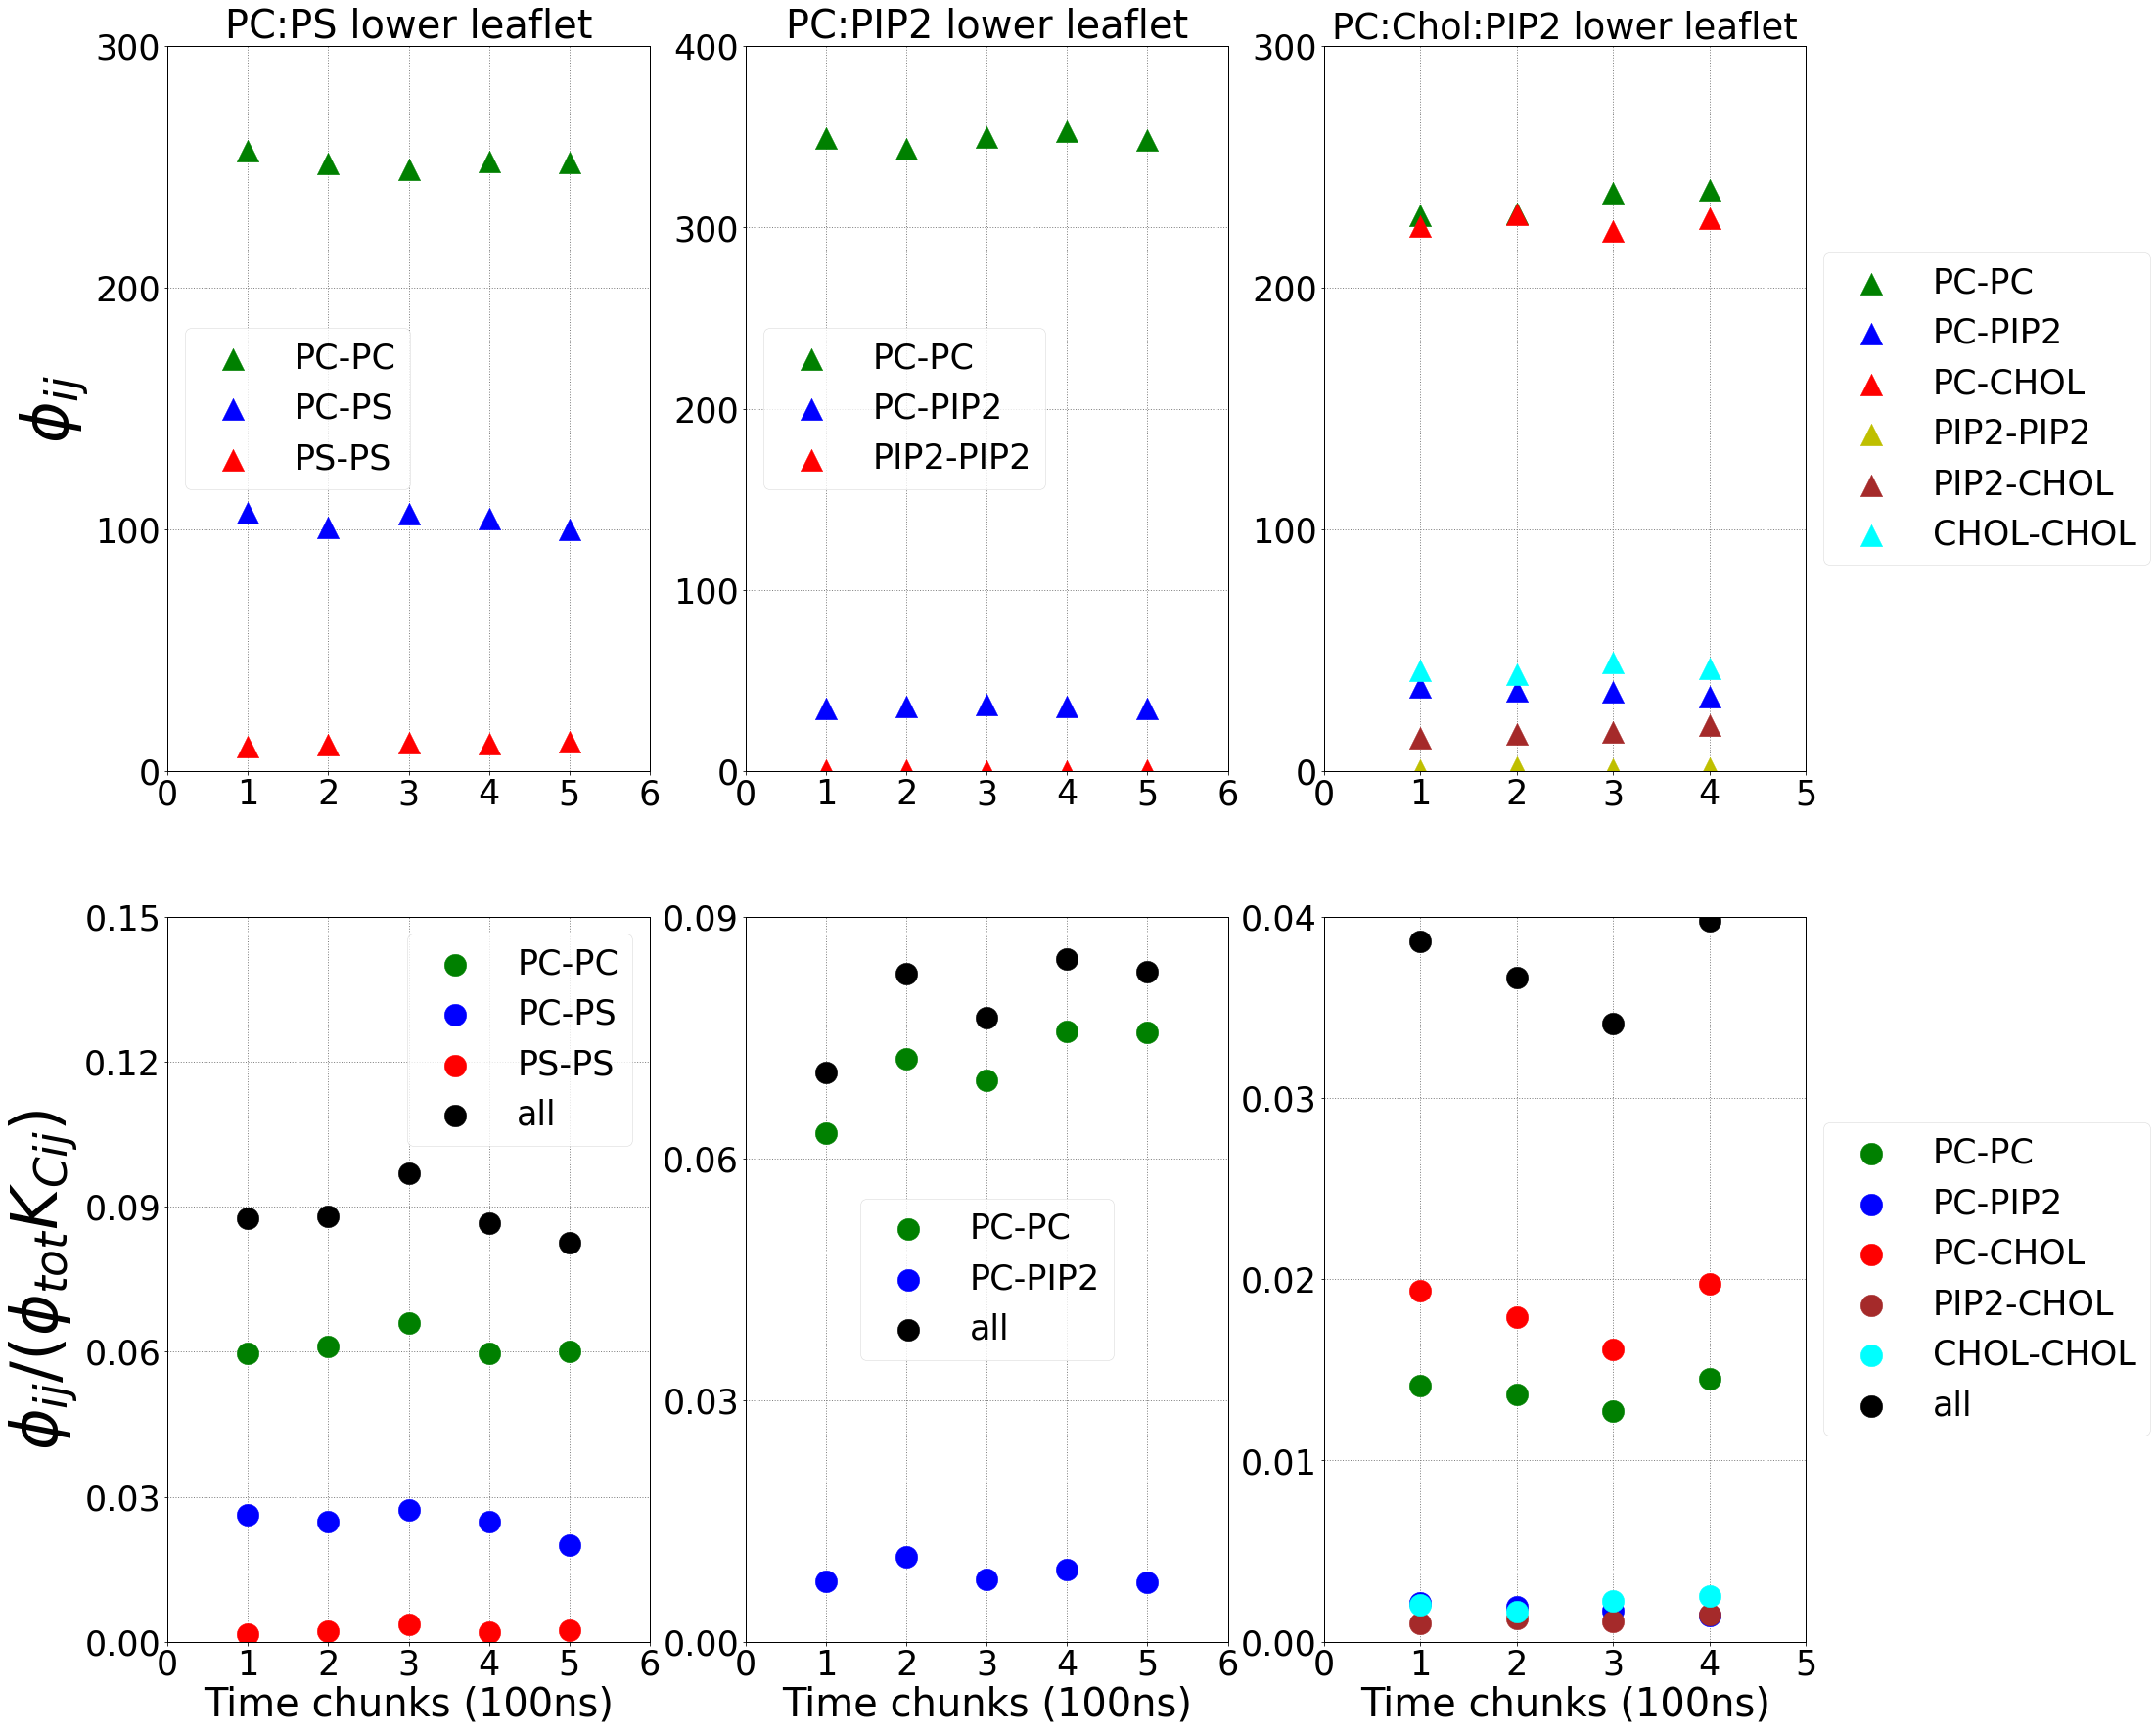

In [195]:
plt.rcParams['axes.facecolor']='white'
import matplotlib
matplotlib.rc('axes',edgecolor='k')
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(30,30))

ax1.scatter(dataPS['Chunk'],dataPSn['pc-pc'],s=500, marker='^', color='g',label='PC-PC')
ax1.scatter(dataPS['Chunk'],dataPSn['pc-ps'],s=500, marker='^', color='b',label='PC-PS')
ax1.scatter(dataPS['Chunk'],dataPSn['ps-ps'],s=500, marker='^', color='r',label='PS-PS')
#ax1.scatter(dataPS['Chunk'],dataPSn['sum'],  s=50, color='k',label='all')
ax1.grid(linestyle=':',linewidth='1',color='grey')
ax1.legend(loc='center left',fontsize=35)
#ax1.set_xlabel(r"Time chunks (100ns)",color='k',fontsize=20)
ax1.set_ylabel(r"$\phi_{ij}$",color='k',fontsize=65)
ax1.set_title('PC:PS lower leaflet',fontsize=40)
ax1.tick_params(axis='x',colors='black')
ax1.tick_params(axis='y',colors='black')
ax1.tick_params(axis='x',which='major',labelsize=35)
ax1.tick_params(axis='y',which='major',labelsize=35)
ax1.set_xlim(0,6)
ax1.set_xticks(np.arange(0,7,1))
ax1.set_ylim(0,300)
ax1.set_yticks(np.arange(0,400,100))


ax2.scatter(dataPS['Chunk'],dataPIn['pc-pc'],s=500, marker='^', color='g',label='PC-PC')
ax2.scatter(dataPS['Chunk'],dataPIn['pc-pi'],s=500, marker='^', color='b',label='PC-PIP2')
ax2.scatter(dataPS['Chunk'],dataPIn['pi-pi'],s=500, marker='^', color='r',label='PIP2-PIP2')
#ax2.scatter(dataPS['Chunk'],dataPIn['sum'],  s=50, color='k',label='all')
ax2.grid(linestyle=':',linewidth='1',color='grey')
ax2.legend(loc='center left',fontsize=35)
#ax2.set_xlabel(r"Time chunks (100ns)",color='k',fontsize=20)
ax2.set_title('PC:PIP2 lower leaflet',fontsize=40)
ax2.tick_params(axis='x',colors='black')
ax2.tick_params(axis='y',colors='black')
ax2.tick_params(axis='x',which='major',labelsize=35)
ax2.tick_params(axis='y',which='major',labelsize=35)
ax2.set_xlim(0,6)
ax2.set_xticks(np.arange(0,7,1))
ax2.set_ylim(0,400)
ax2.set_yticks(np.arange(0,500,100))


ax3.scatter(dataPS['Chunk'][0:4],dataCHOLn['pc-pc'][0:4],    s=500, marker='^', color='g',    label='PC-PC')
ax3.scatter(dataPS['Chunk'][0:4],dataCHOLn['pc-pi'][0:4],    s=500, marker='^', color='b',    label='PC-PIP2')
ax3.scatter(dataPS['Chunk'][0:4],dataCHOLn['pc-chol'][0:4],  s=500, marker='^', color='r',    label='PC-CHOL')
ax3.scatter(dataPS['Chunk'][0:4],dataCHOLn['pi-pi'][0:4],    s=500, marker='^', color='y',    label='PIP2-PIP2')
ax3.scatter(dataPS['Chunk'][0:4],dataCHOLn['pi-chol'][0:4],  s=500, marker='^', color='brown',label='PIP2-CHOL')
ax3.scatter(dataPS['Chunk'][0:4],dataCHOLn['chol-chol'][0:4],s=500, marker='^', color='cyan', label='CHOL-CHOL')
#ax3.scatter(dataPS['Chunk'][0:4],dataCHOLn['sum'][0:4],      s=50, color='k',    label='all')
ax3.grid(linestyle=':',linewidth='1',color='grey')
ax3.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=35)
#ax3.set_xlabel(r"Time chunks (100ns)",color='k',fontsize=20)
ax3.set_title('PC:Chol:PIP2 lower leaflet',fontsize=37)
ax3.tick_params(axis='x',colors='black')
ax3.tick_params(axis='y',colors='black')
ax3.tick_params(axis='x',which='major',labelsize=35)
ax3.tick_params(axis='y',which='major',labelsize=35)
ax3.set_xlim(0,5)
ax3.set_xticks(np.arange(0,6,1))
ax3.set_ylim(0,300)
ax3.set_yticks(np.arange(0,400,100))


ax4.scatter(dataPS['Chunk'],dataPS['pc-pc'],s=500, color='g',label='PC-PC')
ax4.scatter(dataPS['Chunk'],dataPS['pc-ps'],s=500, color='b',label='PC-PS')
ax4.scatter(dataPS['Chunk'],dataPS['ps-ps'],s=500, color='r',label='PS-PS')
ax4.scatter(dataPS['Chunk'],dataPS['sum'],  s=500, color='k',label='all')
ax4.grid(linestyle=':',linewidth='1',color='grey')
ax4.legend(loc='best',fontsize=35)
ax4.set_xlabel(r"Time chunks (100ns)",color='k',fontsize=40)
ax4.set_ylabel(r"$\phi_{ij}/(\phi_{tot}K_{Cij})$",color='k',fontsize=65)
#ax4.set_title('POPC:POPS lower leaflet',fontsize=20)
ax4.tick_params(axis='x',colors='black')
ax4.tick_params(axis='y',colors='black')
ax4.tick_params(axis='x',which='major',labelsize=35)
ax4.tick_params(axis='y',which='major',labelsize=35)
ax4.set_xlim(0,6)
ax4.set_xticks(np.arange(0,7,1))
ax4.set_ylim(0,0.15)
ax4.set_yticks(np.arange(0,0.18,0.03))


ax5.scatter(dataPS['Chunk'],dataPI['pc-pc'],s=500, color='g',label='PC-PC')
ax5.scatter(dataPS['Chunk'],dataPI['pc-pi'],s=500, color='b',label='PC-PIP2')
ax5.scatter(dataPS['Chunk'],dataPI['sum'],  s=500, color='k',label='all')
ax5.grid(linestyle=':',linewidth='1',color='grey')
ax5.legend(loc='center',fontsize=35)
ax5.set_xlabel(r"Time chunks (100ns)",color='k',fontsize=40)
#ax5.set_title('POPC:PIP2 lower leaflet',fontsize=20)
ax5.tick_params(axis='x',colors='black')
ax5.tick_params(axis='y',colors='black')
ax5.tick_params(axis='x',which='major',labelsize=35)
ax5.tick_params(axis='y',which='major',labelsize=35)
ax5.set_xlim(0,6)
ax5.set_xticks(np.arange(0,7,1))
ax5.set_ylim(0,0.09)
ax5.set_yticks(np.arange(0,0.12,0.03))


ax6.scatter(dataPS['Chunk'][0:4],dataCHOL['pc-pc'][0:4],    s=500, color='g',    label='PC-PC')
ax6.scatter(dataPS['Chunk'][0:4],dataCHOL['pc-pi'][0:4],    s=500, color='b',    label='PC-PIP2')
ax6.scatter(dataPS['Chunk'][0:4],dataCHOL['pc-chol'][0:4],  s=500, color='r',    label='PC-CHOL')
#ax6.scatter(dataPS['Chunk'][0:4],dataCHOL['pi-pi'][0:4],    s=500, color='y',    label='PIP2-PIP2')
ax6.scatter(dataPS['Chunk'][0:4],dataCHOL['pi-chol'][0:4],  s=500, color='brown',label='PIP2-CHOL')
ax6.scatter(dataPS['Chunk'][0:4],dataCHOL['chol-chol'][0:4],s=500, color='cyan', label='CHOL-CHOL')
ax6.scatter(dataPS['Chunk'][0:4],dataCHOL['sum'][0:4],      s=500, color='k',    label='all')
ax6.grid(linestyle=':',linewidth='1',color='grey')
ax6.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=35)
ax6.set_xlabel(r"Time chunks (100ns)",color='k',fontsize=40)
#ax6.set_title('POPC:PIP2:CHOL lower leaflet',fontsize=20)
ax6.tick_params(axis='x',colors='black')
ax6.tick_params(axis='y',colors='black')
ax6.tick_params(axis='x',which='major',labelsize=35)
ax6.tick_params(axis='y',which='major',labelsize=35)
ax6.set_xlim(0,5)
ax6.set_xticks(np.arange(0,6,1))
ax6.set_ylim(0,0.04)
ax6.set_yticks(np.arange(0,0.05,0.01))

In [190]:
fig.savefig('kc_nij.png',dpi=300,bbox_inches='tight')